In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pywt
import seaborn as sns
import csv
import glob
import librosa as librosa
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, accuracy_score
import time


import os
import hmmlearn.vhmm
from hmmlearn import hmm
from sklearn.model_selection import KFold


In [232]:
class HMMTrainer(object):
  def __init__(self, model_name='GaussianHMM', n_components=4, cov_type='full', n_iter=500):
    self.model_name = model_name
    self.n_components = n_components
    self.cov_type = cov_type
    self.n_iter = n_iter
    self.means_prior=means_prior
    self.models = []
    if self.model_name == 'GaussianHMM':
      self.model = hmmlearn.hmm.GaussianHMM(
          n_components=10,covariance_type='full', n_iter=700)
    else:
      raise TypeError('Invalid model type') 

  def train(self, X):
    np.seterr(all='ignore')
    self.models.append(self.model.fit(X))
    # Run the model on input data
  def get_score(self, input_data):
    return self.model.score(input_data)

In [233]:
labels = ("fall", "run", "sitdown","walk","standup")
hmm_models = []
training_full=dict()
for label in labels:
    file_path='/Users/shreyu/Desktop/proiject/model_3/my_model/Untitled Folder/'+str(label)+'_DWT_200msec.csv'
    data = (pd.read_csv(file_path,header=None).values)[1:,:-1]

    middle_start = int(len(data) * 0.6)  # 40% mark
    middle_end = int(len(data) * 0.8)    # 60% mark

    # Retrieve the remaining 80% data (excluding middle 20%)
    X_train = np.concatenate([data[:middle_start], data[middle_end:]])
    X_test = data[middle_start:middle_end]

    training_full['X_'+str(label)+'_train']=X_train
    training_full['X_'+str(label)+'_test']=X_test

    X_train=X_train.reshape(X_train.size, -1)
    

    
    hmm_trainer = HMMTrainer(n_components=10)
    hmm_trainer.train(X_train)
    hmm_models.append((hmm_trainer, str(label)))
    hmm_trainer = None

    

In [234]:
hmm_models

[(<__main__.HMMTrainer at 0x7f96b8e51f70>, 'fall'),
 (<__main__.HMMTrainer at 0x7f93931731c0>, 'run'),
 (<__main__.HMMTrainer at 0x7f96cc7dc370>, 'sitdown'),
 (<__main__.HMMTrainer at 0x7f96b8ea1190>, 'walk'),
 (<__main__.HMMTrainer at 0x7f96cc81c430>, 'standup')]

In [100]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,5947.5606,3427.69462,2551.386075,1015.595457,390.256505,212.462748,45.400241,30.170062,37.189883,22.053547,...,876.308546,1535.790618,625.338952,177.793757,167.062507,15.230179,7.019821,15.136336,19.56751,1.383206
1,3011.612269,1794.801472,1833.677327,1555.8378,1976.757682,1440.877693,113.242286,16.99183,17.29944,3.392703,...,38.875855,277.839526,420.919882,535.879989,1327.635407,96.250456,0.30761,13.906737,2.246436,0.565778
2,3064.428344,1861.628459,1869.13863,886.153804,540.63723,287.614349,49.7039,10.523766,9.029326,2.465764,...,7.510171,982.984826,345.516574,253.02288,237.910449,39.180134,1.49444,6.563562,1.678618,0.458015
3,7787.380353,4618.30231,4420.554933,1941.342158,594.921048,95.752295,6.76638,9.520857,5.134105,2.18651,...,197.747378,2479.212774,1346.421111,499.168753,88.985914,2.754477,4.386752,2.947594,1.261857,0.550885
4,2759.792055,1628.599855,1495.150243,593.168818,145.38654,21.544708,8.759776,4.53869,4.990703,1.657118,...,133.449611,901.981425,447.782278,123.841832,12.784932,4.221086,0.452013,3.333585,0.833934,0.528235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7896,235.057118,136.196712,108.651567,38.886473,13.092254,11.654825,16.066188,23.337295,14.555002,3.128469,...,27.545145,69.765094,25.794219,1.437429,4.411363,7.271108,8.782293,11.426533,1.288342,0.550117
7897,49.748733,29.205608,25.805049,16.083808,17.857062,36.456279,18.080963,15.416463,15.883465,3.590184,...,3.400559,9.72124,1.773253,18.599217,18.375316,2.6645,0.467002,12.293281,1.448083,0.873259
7898,61.162124,36.061679,31.776306,12.969387,4.583705,12.749172,26.996098,12.185448,11.925257,2.886166,...,4.285374,18.806919,8.385682,8.165467,14.246926,14.810651,0.260191,9.039091,1.052214,0.496996
7899,209.297063,123.97762,113.597691,43.969716,16.283163,14.685935,15.039728,14.769555,8.928742,4.142387,...,10.37993,69.627974,27.686553,1.597228,0.353793,0.270173,5.840813,4.786355,1.665922,1.175109


In [114]:
labels = ("fall", "run", "sitdown","walk","standup")
hmm_models = []
training_full=dict()
for label in labels:
    file_path='/Users/shreyu/Desktop/proiject/model_3/my_model/Untitled Folder/'+str(label)+'_DWT_200msec_new.csv'
    data = (pd.read_csv(file_path,header=None).values)[1:,:-1]

    middle_start = int(len(data) * 0.6)  # 40% mark
    middle_end = int(len(data) * 0.8)    # 60% mark

    # Retrieve the remaining 80% data (excluding middle 20%)
    X_train = np.concatenate([data[:middle_start], data[middle_end:]])
    X_test = data[middle_start:middle_end]

    training_full['X_'+str(label)+'_train']=X_train
    training_full['X_'+str(label)+'_test']=X_test

    X_train=X_train.reshape(X_train.size, -1)
    
    
    
    # Create a KFold object for 10-fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    best_model = None
    best_score = float("-inf")

    for train_indices, test_indices in kf.split(X_train):
        train_data = X_train[train_indices]
        test_data = X_train[test_indices]

        # Create an HMM model
        model = hmm.GaussianHMM(n_components=10,covariance_type='full',
          algorithm='baum-welch', random_state=None, n_iter=500)

        # Train the model on the training data
        model.fit(X_train)

        # Evaluate the model using Log Likelihood
        log_likelihood = model.score(train_data)

        if log_likelihood > best_score:
            best_score = log_likelihood
            best_model = model

    
    
    #hmm_trainer = HMMTrainer(n_components=10)
    #hmm_trainer.train(X_train)
    hmm_models.append((best_model, str(label)))
    hmm_trainer = None

    

In [210]:
hmm_models

[(<__main__.HMMTrainer at 0x7f93925bc4c0>, 'fall'),
 (<__main__.HMMTrainer at 0x7f969bbf71f0>, 'run'),
 (<__main__.HMMTrainer at 0x7f93931738b0>, 'sitdown'),
 (<__main__.HMMTrainer at 0x7f93989d6160>, 'walk'),
 (<__main__.HMMTrainer at 0x7f969c66f430>, 'standup')]

In [235]:
test_labels = ("fall", "run", "sitdown","walk","standup")
real_labels = []
pred_labels = []
for label in test_labels:
    for i in range (0,1581,100):
        test=training_full['X_'+str(label)+'_test'][i:i+100]
        test=test.reshape(test.size, -1)
        real_labels.append(label)
        pred_score = -9999999999999999999
        for item in hmm_models:
            hmm_model, tag = item
            score = hmm_model.get_score(test)
            if score > pred_score:
                pred_score = score
                output_label = tag
        pred_labels.append(output_label)
        

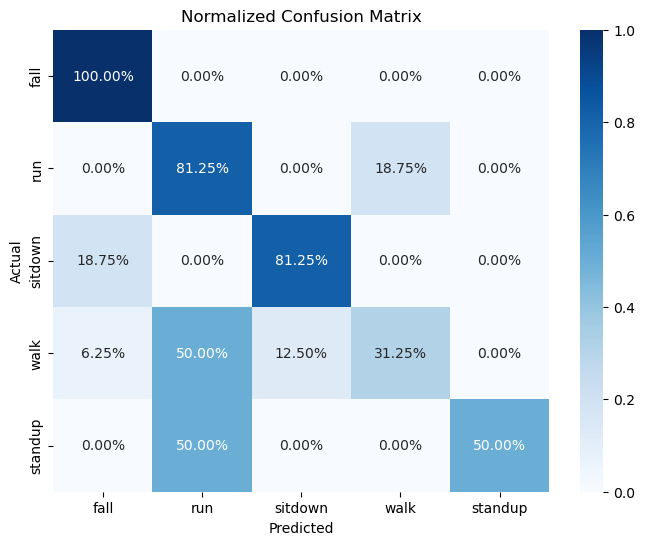

In [245]:
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(real_labels,pred_labels,labels=("fall", "run", "sitdown","walk","standup"), normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm_1, annot=True, cmap='Blues', fmt=".2%", xticklabels=["fall", "run", "sitdown","walk","standup"], yticklabels=["fall", "run", "sitdown","walk","standup"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

In [237]:
from sklearn.metrics import f1_score, recall_score , precision_score,classification_report
# Calculate evaluation metrics
accuracy = accuracy_score(real_labels, pred_labels)
f1 = f1_score(real_labels, pred_labels, average='weighted')
recall = recall_score(real_labels, pred_labels, average='weighted')
precision = precision_score(real_labels, pred_labels, average='weighted')


plt.show()

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')


Accuracy: 0.69
F1 Score: 0.68
Recall: 0.69
Precision: 0.75


In [238]:
class_report = classification_report(real_labels, pred_labels)
print("Classification Report:\n")
print(class_report)

Classification Report:

              precision    recall  f1-score   support

        fall       0.80      1.00      0.89        16
         run       0.45      0.81      0.58        16
     sitdown       0.87      0.81      0.84        16
     standup       1.00      0.50      0.67        16
        walk       0.62      0.31      0.42        16

    accuracy                           0.69        80
   macro avg       0.75      0.69      0.68        80
weighted avg       0.75      0.69      0.68        80

